In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Generating new features

new features can be: total acidity, categorize alcohol, indicate ph above average, wine type after merge

In [34]:
df_red = pd.read_csv("winequality-red.csv", delimiter=";")
df_white = pd.read_csv("winequality-white.csv", delimiter=";")
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Merge datasets

In [35]:
df_red.shape, df_white.shape

((1599, 12), (4898, 12))

In [36]:
df_red["type"] = "red"
df_white["type"] = "white"

In [37]:
df = df_red.merge(df_white, "outer")
df.shape

(6497, 13)

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


add total acidity

In [39]:
df["total acidity"] = df["fixed acidity"] + df["volatile acidity"]

add alcohol category

In [40]:
df["alcohol category"] = pd.cut(df['alcohol'], bins=[float('-inf'), 10, 11, float('inf')], labels=['low', 'medium', 'high'])

add above average ph

In [41]:
df["high pH"] = (df["pH"] > df["pH"].mean()).astype(int) 

add ph to alcohol ratio

In [42]:
df["pH alcohol ratio"] = df["pH"] / df["alcohol"]

### Summary

In [43]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,total acidity,alcohol category,high pH,pH alcohol ratio
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497.000000,6497,6497.000000,6497.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,NaN,low,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,NaN,2832,NaN,NaN
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,7.554973,NaN,0.482684,0.310354
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,1.342139,NaN,0.499739,0.035066
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,4.110000,NaN,0.000000,0.200000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,6.710000,NaN,0.000000,0.283621
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,7.300000,NaN,0.000000,0.315306
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,8.050000,NaN,1.000000,0.337363


In [45]:
df["alcohol category"].value_counts()

alcohol category
low       2832
high      1969
medium    1696
Name: count, dtype: int64

In [46]:
df["high pH"].value_counts()

high pH
0    3361
1    3136
Name: count, dtype: int64

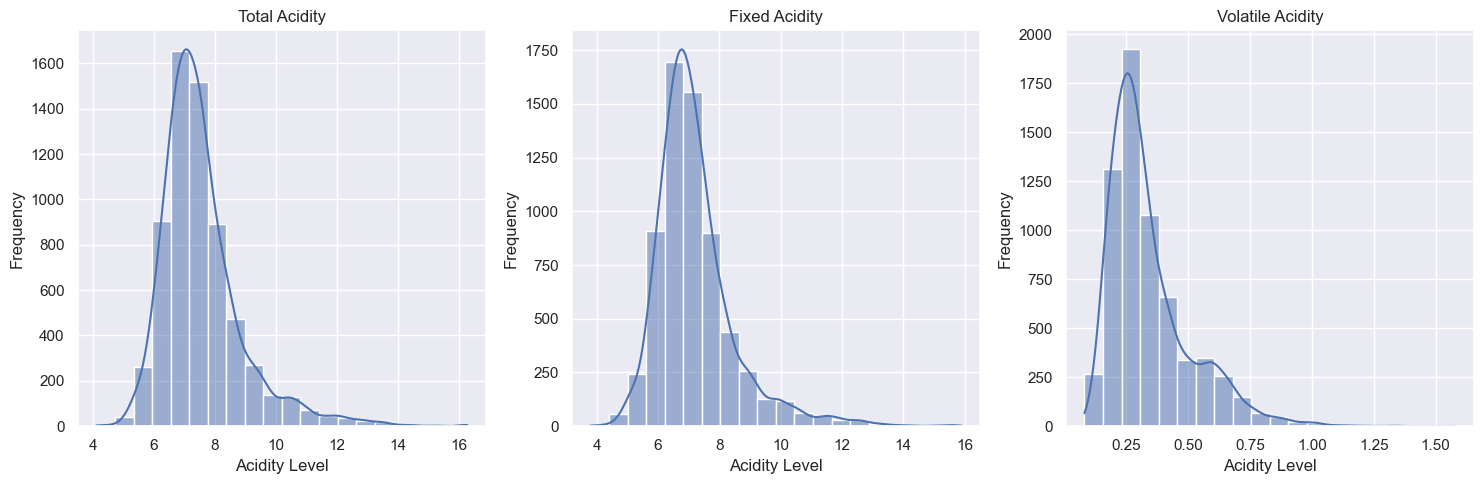

In [57]:
data = [df['total acidity'], df['fixed acidity'], df['volatile acidity']]
labels = ['Total Acidity', 'Fixed Acidity', 'Volatile Acidity']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    sns.histplot(data[i], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('Acidity Level')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

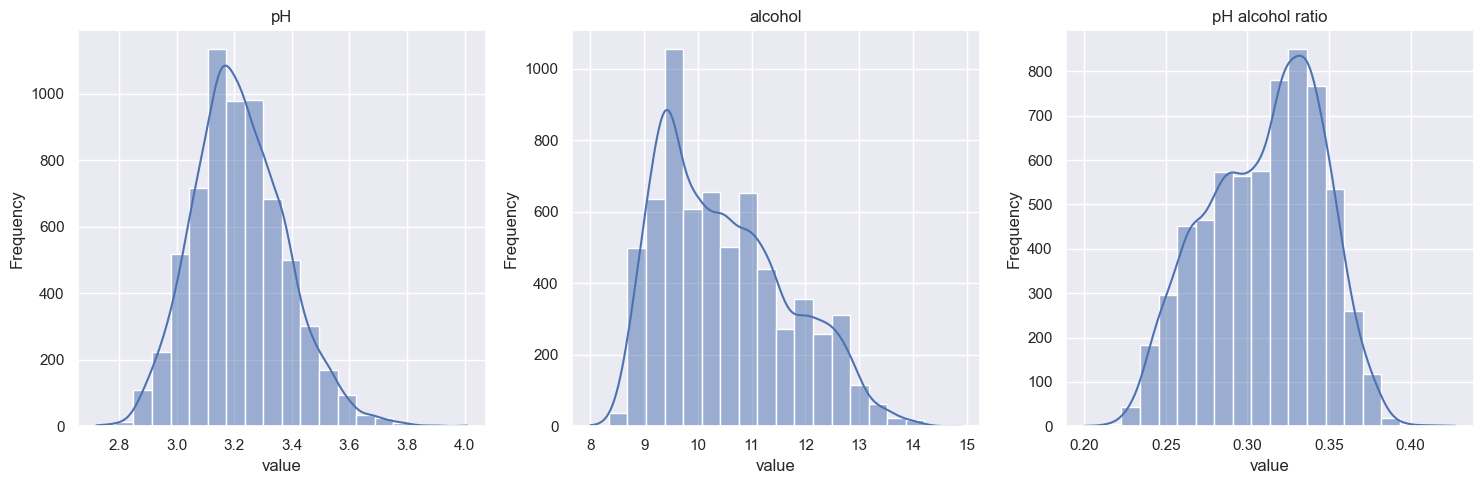

In [56]:
data = [df['pH'], df['alcohol'], df['pH alcohol ratio']]
labels = ['pH', 'alcohol', 'pH alcohol ratio']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    sns.histplot(data[i], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()